# EDA - Projeto ADA

O presente documento tem por finalidade ser um EDA (Exploratory Data Analysis) como projeto para o curso Técnicas de Programação da ADA. Os dados aqui escolhidos para análise são de caráter público e sua origem é encontrada em: https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch.



## Cabeçalho

Os estudantes responsáveis pelas análises e pelo uso dos dados em questão são:
- Bruno Bastos
- Delson Cardoso
- Luiz Gabriel 
- Igor Raphael 
- Mia Valentin

Todos acima são estudantes da Ada Tech, participantes do programa Data4All, ofertado em parceria com as empresas Gerdau & RandStand.

## Início do EDA

#### Importando Bibliotecas a serem utilizadas

In [2]:
import pandas as pd
import numpy as np

#### Carregando os dados

In [3]:
games_data = pd.read_csv('Twitch_game_data.csv', encoding = "ISO-8859-1")

games_data.rename(columns={
    'Game':'jogo',
    'Month':'mes',
    'Year':'ano',
    'Hours_watched':'horas_assistidas',
    'Hours_Streamed':'horas_transmitidas',
    'Peak_viewers':'pico_de_visualizacoes',
    'Peak_channels':'pico_de_canais',
    'Avg_viewers':'media_de_espectadores',
    'Avg_channels':'media_canais',
    'Avg_viewer_ratio':'media_de_proporção_de_espectadores',
}, inplace=True)

games_data.tail()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
16995,196,Tom Clancy's The Division 2,1,2023,666943(118.3%),97138(59.5%),2759(49.9%),249(48.2%),12805(68.1%),897(118.2%),130(60.5%),6.87(36.9%)
16996,197,Persona 5 Royal,1,2023,664503(-2.9%),68310(2.7%),10494(19.6%),198(4.8%),7475(4.8%),894(-2.9%),91(2.2%),9.73(-5.4%)
16997,198,Bloodborne,1,2023,663078(59.1%),45522(31.8%),9455(30.4%),117(8.3%),8355(27.5%),892(59.3%),61(32.6%),14.57(20.7%)
16998,199,PowerWash Simulator,1,2023,657644(356.0%),18494(53.7%),63757(473.9%),192(346.5%),6589(42.3%),885(356.2%),24(50%),35.56(196.6%)
16999,200,Eternal Return,1,2023,642217(2.4%),24245(7.7%),9933(16.7%),97(15.5%),1997(6.2%),864(2.5%),32(6.7%),26.49(-4.9%)


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Rank                                17000 non-null  int64 
 1   jogo                                16999 non-null  object
 2   mes                                 17000 non-null  int64 
 3   ano                                 17000 non-null  int64 
 4   horas_assistidas                    17000 non-null  object
 5   horas_transmitidas                  17000 non-null  object
 6   pico_de_visualizacoes               17000 non-null  object
 7   pico_de_canais                      17000 non-null  object
 8   Streamers                           17000 non-null  object
 9   media_de_espectadores               17000 non-null  object
 10  media_canais                        17000 non-null  object
 11  media_de_proporção_de_espectadores  17000 non-null  ob

# Tratar os dados

In [5]:
#Limpa os valores que estão entre parênteses e converte para float Ex: 470(15.0%) String -> [470 , 15.0%)] list -> 470 float
games_data['media_de_espectadores'] = games_data.loc[:,'media_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')
games_data['media_canais'] = games_data.loc[:,'media_canais'].str.split('(').apply(lambda lista: lista[0]).astype('float')
games_data['media_de_proporção_de_espectadores'] = games_data.loc[:,'media_de_proporção_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')

In [6]:
#Limpa os valores que estão entre parênteses Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> [542342] string dentro de uma lista
games_data['horas_transmitidas'] = games_data.loc[:, 'horas_transmitidas'].str.split('(').apply(lambda lista: lista[0])
#Verifica valores não numéricos e os retira da string, converte a string restante em inteiro Ex: 231456 hours string -> 231456 string -> 231456 inteiro
games_data['horas_transmitidas'] = games_data['horas_transmitidas'].replace(to_replace=r'[^0-9]', value='', regex=True).astype(int)

In [7]:
#Limpa os valores que estão entre parênteses e converte para inteiro Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> 542342 inteiro
games_data['horas_assistidas'] = games_data.loc[:,'horas_assistidas'].str.split('(').apply(lambda lista: lista[0]).astype('int')
games_data['pico_de_visualizacoes'] = games_data.loc[:,'pico_de_visualizacoes'].str.split('(').apply(lambda lista: lista[0]).astype('int')
games_data['pico_de_canais'] = games_data.loc[:,'pico_de_canais'].str.split('(').apply(lambda lista: lista[0]).astype('int')
games_data['Streamers'] = games_data.loc[:,'Streamers'].str.split('(').apply(lambda lista: lista[0]).astype('int')

In [8]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                17000 non-null  int64  
 1   jogo                                16999 non-null  object 
 2   mes                                 17000 non-null  int64  
 3   ano                                 17000 non-null  int64  
 4   horas_assistidas                    17000 non-null  int32  
 5   horas_transmitidas                  17000 non-null  int32  
 6   pico_de_visualizacoes               17000 non-null  int32  
 7   pico_de_canais                      17000 non-null  int32  
 8   Streamers                           17000 non-null  int32  
 9   media_de_espectadores               17000 non-null  float64
 10  media_canais                        17000 non-null  float64
 11  media_de_proporção_de_espectadores  17000

In [9]:
games_data.head()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378.0,1117.0,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815.0,583.0,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749.0,317.0,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740.0,1549.0,14.03


In [10]:
games_data.tail()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
16995,196,Tom Clancy's The Division 2,1,2023,666943,97138,2759,249,12805,897.0,130.0,6.87
16996,197,Persona 5 Royal,1,2023,664503,68310,10494,198,7475,894.0,91.0,9.73
16997,198,Bloodborne,1,2023,663078,45522,9455,117,8355,892.0,61.0,14.57
16998,199,PowerWash Simulator,1,2023,657644,18494,63757,192,6589,885.0,24.0,35.56
16999,200,Eternal Return,1,2023,642217,24245,9933,97,1997,864.0,32.0,26.49


# Análises

Agrupando por ano, filtrando o numero de vezes que os jogos apareceram em top 20 e selecionando os que aparecem todos os anos e os que so apareceram 1 vez.

In [11]:
num_anos = games_data['ano'].nunique()
game_top20 = games_data.groupby('ano').head(20)['jogo'].value_counts()
i = 0
top_all_years = []
top_one_year = []
for vezes in game_top20:
    if(vezes == num_anos):
        top_all_years.append(game_top20.index[i])
    elif(vezes == 1):
        top_one_year.append(game_top20.index[i])
    i+=1
num_all_years = len(top_all_years)
num_one_years = len(top_one_year)

prop = len(top_all_years)/len(top_one_year)


In [12]:
num_all_years = len(top_all_years)
num_one_years = len(top_one_year)

prop = num_one_years/num_all_years

In [13]:
# Jogos que aparecem no top 20 todos os anos
print('Jogos que aparecem no top 20 todos os anos:')
for i in range(len(top_all_years)):
    print(top_all_years[i])
print(f'Total: {len(top_all_years)}')
# Jogos que aparecem no top 20 só uma vez
print('\nJogos que aparecem no top 20 só uma vez:')
for i in range(len(top_one_year)):
    print(top_one_year[i])
print(f'Total: {len(top_one_year)}')
# Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem
print('Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem:')

print(f'{num_one_years}/{num_all_years} = {prop}')


Jogos que aparecem no top 20 todos os anos:
League of Legends
Dota 2
World of Warcraft
Counter-Strike: Global Offensive
Total: 4

Jogos que aparecem no top 20 só uma vez:
DRAGON BALL Z: KAKAROT
FIFA 20
Sports
FIFA 23
FIFA 21
Among Us
Rocket League
Overwatch 2
PokÃ©mon Legends: Arceus
FIFA 22
They Are Billions
Super Smash Bros. Ultimate
Atlas
Call of Duty: Black Ops III
FIFA 16
Diablo III
Blade & Soul
Tom Clancy's The Division
Resident Evil 7 biohazard
FIFA 17
For Honor
Creative
IRL
FIFA 18
Slay the Spire
VRChat
Subnautica
FIFA 19
Call of Duty: Black Ops 4
Resident Evil 2
Virtual Casino
Total: 31
Proporção de jogos que aparecem apenas uma vez vs que sempre aparecem:
31/4 = 7.75


Ou seja para cada 1 jogo que esteve sempre no top 20 nos ultimos 7/8 anos existe quase 8 jogos que so duram 1 ano no top 20, onde podemos encontrar um "monopólio" no mercado de streams onde 3 dos 4 jogos que se mantem são jogos competitivos onde existe um forte mercado de E-sports

In [19]:
hr_ass_per_espec = games_data.groupby('jogo', sort = False)['horas_assistidas','media_de_espectadores'].sum().head(20)

print((hr_ass_per_espec['horas_assistidas']/hr_ass_per_espec['media_de_espectadores'])/85)

jogo
League of Legends                   8.582378
Counter-Strike: Global Offensive    8.570357
Dota 2                              8.589292
Hearthstone                         8.585236
Call of Duty: Black Ops III         8.574619
Minecraft                           8.589410
World of Warcraft                   8.593496
Z1: Battle Royale                   8.561753
Talk Shows & Podcasts               8.578025
FIFA 16                             8.600308
StarCraft II                        8.574036
Diablo III                          8.596917
Destiny                             8.574869
Blade & Soul                        8.578688
World of Tanks                      8.586471
Tom Clancy's Rainbow Six Siege      8.548454
RuneScape                           8.579671
Tom Clancy's The Division           8.621903
Grand Theft Auto V                  8.585371
SMITE                               8.579848
dtype: float64


C:\Users\hyggo\AppData\Local\Temp\ipykernel_19320\3746046832.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hr_ass_per_espec = games_data.groupby('jogo', sort = False)['horas_assistidas','media_de_espectadores'].sum().head(20)


Conseguimos ver que a média de horas assistidas por espectador não se altera muito de jogo para jogo.

Análise visual de picos de visualizações dos jogos mais vistos em todos anos

In [15]:
peak_view_top_games = games_data.loc[:,['jogo','mes','ano','pico_de_visualizacoes']]
peak_view_top_games = peak_view_top_games.loc[peak_view_top_games['jogo'].isin(top_all_years)]
peak_view_top_games['ano-mes'] = peak_view_top_games["ano"].apply(str).map(str) + "-" + peak_view_top_games["mes"].apply(str)
peak_view_top_games = peak_view_top_games.loc[:,['jogo','ano-mes','pico_de_visualizacoes']]
peak_view_top_games.groupby(['jogo','ano-mes']).first()

pico_de_visualizacoes
jogo                             ano-mes                       
Counter-Strike: Global Offensive 2016-1                  372654
                                 2016-10                 336075
                                 2016-11                 219844
                                 2016-12                 240717
                                 2016-2                  235027
...                                                         ...
World of Warcraft                2022-6                  122452
                                 2022-7                  170747
                                 2022-8                  123167
                                 2022-9                  388768
                                 2023-1                  106922

[340 rows x 1 columns]

array([<Axes: xlabel='ano-mes'>, <Axes: xlabel='ano-mes'>,
       <Axes: xlabel='ano-mes'>, <Axes: xlabel='ano-mes'>], dtype=object)

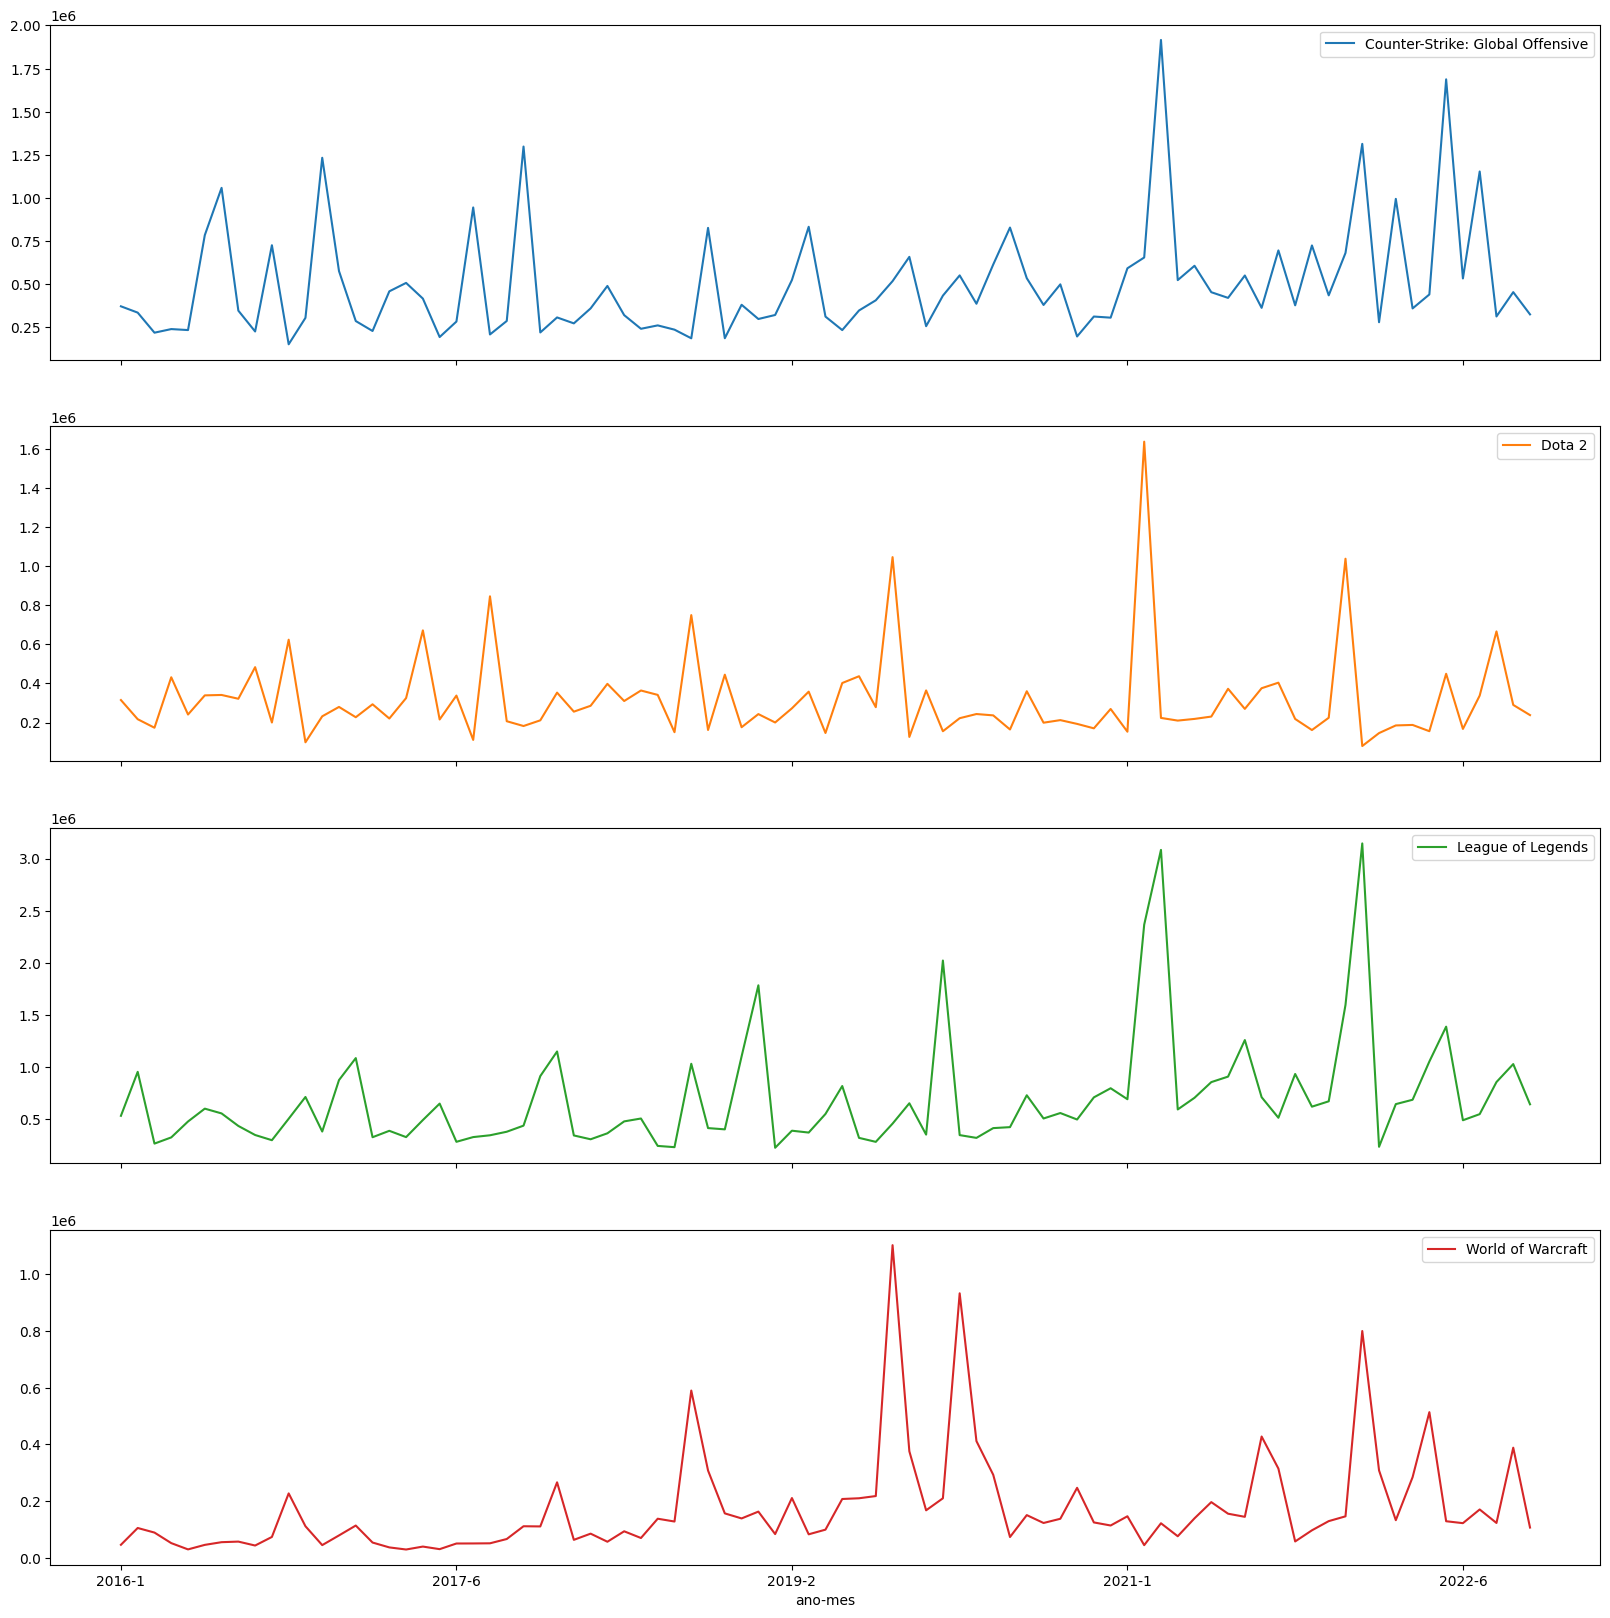

In [16]:
pd.pivot_table(peak_view_top_games.reset_index(),
               index='ano-mes', columns='jogo', values='pico_de_visualizacoes'
              ).plot(subplots=True,figsize=(20, 20))

Conseguimos perceber que todos tem uma alta bem parecida.